<a href="https://colab.research.google.com/github/Atharvamaid/Animation-Nation/blob/master/covid-19-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import cv2
import matplotlib.pyplot as plt
import myanfis
train_path = "/content/drive/MyDrive/Covid19-dataset/train"
test_path = "/content/drive/MyDrive/Covid19-dataset/test"



In [6]:
import numpy as np

train_X = []
train_Y = []

# labels -
# 0 - Covid
# 1 - Viral Pneumonia
# 2 - Normal

def readImg(img_path):
  img = cv2.imread(img_path, cv2.IMREAD_COLOR)
  img = cv2.resize(img, (128,128))
  img = np.array(img, dtype='float32')
  
  img = img/255
  return img


# **Data Extraction and Pre-processing**

In [7]:
for folder in os.scandir(train_path):
  for entry in os.scandir(folder.path):
    train_X.append(readImg(entry.path))

    if (folder.name[0]=='C'):
      train_Y.append(0)
    elif (folder.name[0]=='V'):
      train_Y.append(1)
    else:
      train_Y.append(2)
X_train = np.array(train_X)
Y_train = np.array(train_Y)

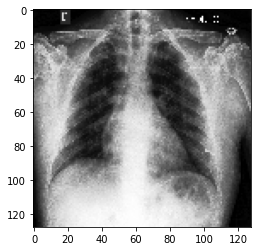

In [8]:
plt.imshow(X_train[0])

<BarContainer object of 3 artists>

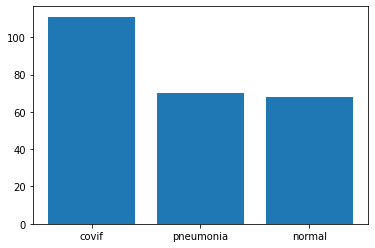

In [5]:
covid_count = len(Y_train[Y_train==0])
pneumonia_count = len(Y_train[Y_train==1])
normal_count = len(Y_train[Y_train==2])

plt.bar(['covif', 'pneumonia', 'normal'], [covid_count, pneumonia_count, normal_count])

# **Convolutional Neural Network**

In [18]:
import tensorflow as tf
param = myanfis.fis_parameters(
        n_input = 3,                # no. of Regressors
        n_memb = 2,                 # no. of fuzzy memberships
        batch_size = 5,            # 16 / 32 / 64 / ...
        memb_func = 'gaussian',      # 'gaussian' / 'gbellmf' / 'sigmoid'
        optimizer = 'sgd',          # sgd / adam / ...
        loss = tf.keras.losses.MeanAbsoluteError(),               # mse / mae / huber_loss / mean_absolute_percentage_error / ...
        n_epochs = 15               # 10 / 25 / 50 / 100 / ...
        )

In [ ]:
fis = myanfis.ANFIS(n_input = param.n_input,
                    n_memb = param.n_memb,
                    batch_size = param.batch_size,
                    memb_func = param.memb_func,
                    name = 'firstAnfis' # buradaki ismi değiştirin
                    )

    # modelimizi aşağıdaki parametreler ile derledik
fis.model.compile(optimizer=param.optimizer,
                      loss=param.loss,
                      metrics=['mae']  # ['mae', 'mse']
                      )
    # burada modelimizin eğitimini başlattık
    # daha sonrasında modelin eğitim sonuçlarını history'e atama yaptık 
history = fis.fit(X_train, Y_train,
                  epochs=param.n_epochs,
                  
                                    )

In [ ]:
from tensorflow.keras import Sequential
import tensorflow as tf



model = Sequential([
        #cnn
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        
       #dense
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')            
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [ ]:
model.fit(X_train, Y_train, epochs=23)

Epoch 1/23
8/8 [==============================] - 7s 710ms/step - loss: 1.3978 - accuracy: 0.4418
Epoch 2/23
8/8 [==============================] - 6s 817ms/step - loss: 0.6732 - accuracy: 0.7912
Epoch 3/23
8/8 [==============================] - 6s 706ms/step - loss: 0.2387 - accuracy: 0.9317
Epoch 4/23
8/8 [==============================] - 7s 913ms/step - loss: 0.1479 - accuracy: 0.9357
Epoch 5/23
8/8 [==============================] - 6s 704ms/step - loss: 0.0896 - accuracy: 0.9558
Epoch 6/23
8/8 [==============================] - 6s 694ms/step - loss: 0.0675 - accuracy: 0.9759
Epoch 7/23
8/8 [==============================] - 6s 704ms/step - loss: 0.0634 - accuracy: 0.9679
Epoch 8/23
8/8 [==============================] - 6s 698ms/step - loss: 0.0250 - accuracy: 0.9920
Epoch 9/23
8/8 [==============================] - 6s 713ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 10/23
8/8 [==============================] - 6s 709ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 11/23
8/8 [==

In [ ]:
model.save('model.h5')

In [ ]:
test_x = []
test_y = []

for folder in os.scandir(test_path):
  for entry in os.scandir(folder.path):
    test_x.append(readImg(entry.path))

    if folder.name[0]=='C':
      test_y.append(0)
    elif folder.name[0]=='V':
      test_y.append(1)
    else:
      test_y.append(2)
X_test = np.array(test_x)
Y_test = np.array(test_y)
print(X_test.shape, Y_test.shape)

(66, 128, 128, 3) (66,)


In [ ]:
model.evaluate(X_test, Y_test)

3/3 [==============================] - 1s 108ms/step - loss: 0.2612 - accuracy: 0.9394


[0.2611863911151886, 0.939393937587738]

In [ ]:
y_predict = model.predict(X_test)
y_predict_labels = np.argmax(y_predict, axis=1)


In [ ]:
y_predict_labels

array([2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
cm = tf.math.confusion_matrix(labels=Y_test, predictions=y_predict_labels)
cm

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[26,  0,  0],
       [ 0, 18,  2],
       [ 1,  1, 18]], dtype=int32)>

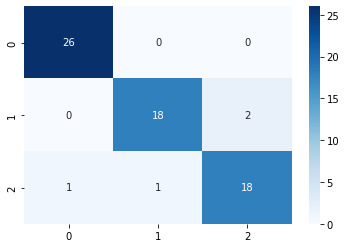

In [ ]:
import seaborn as sn
sn.heatmap(cm, annot=True, cmap='Blues')

In [ ]:
from sklearn.metrics import recall_score
recall_score(Y_test, y_predict_labels, average='macro')

0.9333333333333332

# **Reshaping the numpy arrays**

In [ ]:
X_train = X_train.reshape(249, 128*128*3)
X_test = X_test.reshape(66,128*128*3)

# **Support Vector Machine Classifier**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
sv = SVC()
sv.fit(X_train, Y_train)
y_pred = sv.predict(X_test)
accuracy_score(Y_test, y_pred)

0.8484848484848485

In [ ]:
recall_score(Y_test, y_pred, average='macro')

0.8448717948717949

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, Y_train)
lg_pred = lg.predict(X_test)
accuracy_score(Y_test, lg_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8484848484848485

In [ ]:
recall_score(Y_test,lg_pred,average='macro')

0.8371794871794872

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score,precision_score
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

dt.fit(X_train, Y_train)
rf.fit(X_train, Y_train)
knn.fit(X_train, Y_train)

dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
knn_pred = knn.predict(X_test)

print("Random Forest Classifier", accuracy_score(Y_test,rf_pred), precision_score(Y_test,rf_pred,average='macro'),recall_score(Y_test,rf_pred,average='macro'))
print("K Nearest Neighbour", accuracy_score(Y_test,knn_pred), precision_score(Y_test,knn_pred,average='macro'), recall_score(Y_test,knn_pred,average='macro'))
print("Decision Trees", accuracy_score(Y_test,dt_pred), precision_score(Y_test,dt_pred,average='macro'),recall_score(Y_test,dt_pred,average='macro'))


Random Forest Classifier 0.7727272727272727 0.7837301587301587 0.7615384615384615
K Nearest Neighbour 0.7424242424242424 0.7604999540483411 0.7243589743589745
Decision Trees 0.6363636363636364 0.6281372549019607 0.6192307692307691


In [23]:
!pip install flask-ngrok

In [21]:
!mkdir templates
!mkdir static

In [24]:
from flask import Flask,render_template,request
from flask_ngrok import run_with_ngrok

app = Flask(__name__)

In [26]:
import os
UPLOAD_FOLDER = './static'
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

In [32]:
from keras.models import load_model
from keras.preprocessing import image
import cv2
import numpy as np

loaded_model = load_model('/content/model (2).h5')

classes = {
    0 : 'Covid',
    1 : 'Viral Pneumonia',
    2 : 'Normal'
}

def predictClass(imgPath):
  img = cv2.imread(imgPath, cv2.IMREAD_COLOR)
  img = cv2.resize(img, (128,128))
  img = np.array(img, dtype='float32')
  img = img/255
  img = np.reshape(img, (1,128,128,3))
  label = loaded_model.predict(img)
  predict_labels = np.argmax(label, axis=1)
  return classes[predict_labels[0]]


OSError: ignored

In [ ]:
@app.route('/', methods=['GET', 'POST'])
def home():
  if request.method == 'POST':
    file1 = request.files['file1']
    path = os.path.join(app.config['UPLOAD_FOLDER'], file1.filename)
    file1.save(path)

    p = predictClass(path)
    return render_template('home.html', prediction=p, path=path)
  return render_template('home.html')
        

In [ ]:
run_with_ngrok(app)
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://8b37-35-231-58-8.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


[2022-05-03 10:03:14,359] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/usr/local/lib/python3.7/dist-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-26-c4658170cb70>", line 10, in home
    return render_template('home.html')
  File "/usr/lo